# Assignment 1

## Guidelines

> If you re-use a substantial portion of code you find online, e.g on Stackoverflow, you need to add a link to it and make the borrowing explicit. The same applies of you take it and modify it, even substantially. There is nothing bad in doing that, providing you are acknowledging it and make it clear you know what you're doing. Similarly, if you make use of generative language models (e.g. ChatGPT) to draft your answer, you must acknowledge this and include the prompts used to obtain that output. Again, your answer should be sufficiently commented and described to show that you understand your code.
>
> Make sure your notebooks have been run when you submit, as I won't run them myself. Submit both the `.ipynb` file along with an `.html` export of the same. Submit all necessary auxilliary files as well. Please compress your submission into a `.zip` archive. Only `.zip` files can be submitted.
> If you are using Google Colab, here is a tutorial for obtaining an HTML export: https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab .
>
> With Jupyter, you can simply export it as HTML through the File menu.

---

# Warm up (20 points)

## Question 1 (2 points)

Explain why `list1` and `list2` behave differently when they are passed to the `append_to_nested_list()` function.

In [5]:
def append_to_nested_list(a_list):
    a_list[0].append("Python")
    return a_list
    
list1 = [[], [], []]
list2 = [[]] * 3

print(append_to_nested_list(list1))
print(append_to_nested_list(list2))

[['Python'], [], []]
[['Python'], ['Python'], ['Python']]


> list1 creates a list that contains three separate empty list and each inner list has its own reference in memory, whereas list2 creates three inner list that point to the same object in memory. Hence, that is why we see list1 returns with one Python recorded in one of the inner list, whereas list2 has Python in all of the inner lists

## Question 2 (2 points)

Write a function that counts the total frequency of words that start and end with the same character (e.g. comic) in a text file and test it on `data/melville-md.txt`. 

Ensure that the words are treated case-insensitive.

>The code defines a function to calculate the frequency of words that share the same starting and ending characters. The input is the file path so that it can also be used for other text files. First, the function opens the file, and replaces hypens and line breaks with spaces to avoid broken words and remove hyphens that are not part of the word (e.g.: —Thomas). The text is then tokenize into words which I used chatGPT to help with not including numbers (e.g.: 22). I tried previously with `r'\b\D+\b'` because I thought it will omit digit characters but it resulted for the whole text to be returned rather than the word frequency. The words are then filtered in a loop that makes sure it is more than two characters, and that the first and last characters are the same. The words that meet the criteria are counted by `Counter()` and the function `frequency_same_character` returns the word frequency. In the final output, a loop is employed to print each word along with its corresponding frequency.

In [6]:
import re
from collections import Counter

# preprocessing the text
def frequency_same_character(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
    text = re.sub(r'\b-\b|\n', ' ', text)     # remove hyphens and line breaks within words
    words = re.findall(r'\b[A-Za-z]+\b', text.lower(), flags=re.IGNORECASE)   # tokenize the text into words, excluding numbers

# counting words starting and ending with the same character
    filtered_words = [word for word in words if len(word) >= 2 and word[0] == word[-1]] 
    word_frequency = Counter(filtered_words)
    return word_frequency

# printing result
result = frequency_same_character('data/melville-md.txt')
for word, frequency in result.items():
    print(f"{word}: {frequency}")

gutenberg: 94
www: 6
david: 2
nightgown: 2
wheelbarrow: 4
going: 90
squires: 4
surmises: 4
scenes: 12
stars: 14
heidelburgh: 9
armada: 2
schools: 9
schoolmasters: 3
epilogue: 2
text: 6
that: 3100
wallow: 3
stalls: 1
statements: 5
glancing: 14
eye: 88
thought: 150
sometimes: 87
sadness: 2
subs: 1
ships: 87
sides: 28
sleeps: 7
described: 9
seas: 87
swims: 8
seems: 87
spouts: 16
gaping: 3
edge: 8
shoulders: 13
asia: 5
africa: 8
elbe: 1
did: 258
swiftness: 6
america: 12
sylphs: 1
trust: 4
dead: 92
dread: 12
shores: 7
europe: 5
guarding: 1
repair: 3
suspends: 1
spires: 6
serves: 2
high: 108
aorta: 1
gushing: 1
dived: 11
shoals: 8
sharks: 51
swords: 2
saws: 2
destroyed: 10
shrouds: 8
dimmed: 1
shakes: 5
snaps: 1
species: 31
demanded: 11
survivors: 1
northern: 11
expanse: 3
regular: 24
elsewhere: 13
savages: 10
departed: 14
miriam: 3
distended: 4
growing: 9
rear: 22
surrounds: 2
streets: 15
extreme: 13
sentinels: 1
spiles: 1
peep: 8
spurs: 2
sighs: 2
scores: 4
drowned: 12
schooners: 1
river: 

## Question 3 (2 points)

Rewrite the following code such that:

- the sequence of fruit names are randomly presented (without replacement). Use a function in the [random](https://docs.python.org/3.7/library/random.html) module for this.


- the article "an" is used when a fruit name begins with a vowel.

> I made a for-loop that goes through the list of (shuffled) fruits that checks the first letter of the word if a vowel and assigns "an" if so and "a" otherwise. By default, it returns with "a (fruit)" and changes "a" to "an" when the criteria is met. 

In [7]:
import random

available_fruit = ['apple', 'apricot', 'avocado', 'banana', 'bilberry', 'blackberry', 'blackcurrant', 'blueberry', 'boysenberry', 'currant', 'cherry', 'cherimoya', 'cloudberry', 'coconut', 'cranberry', 'cucumber', 'damson', 'date', 'dragonfruit', 'durian', 'elderberry', 'feijoa', 'fig', 'gooseberry', 'grape', 'raisin', 'grapefruit', 'guava', 'honeyberry', 'huckleberry', 'jabuticaba', 'jackfruit', 'jambul', 'jujube', 'kiwano', 'kiwifruit', 'kumquat', 'lemon', 'lime', 'loquat', 'longan', 'lychee', 'mango', 'mangosteen', 'marionberry', 'melon', 'cantaloupe', 'honeydew', 'watermelon', 'mulberry', 'nectarine', 'nance', 'orange', 'clementine', 'mandarine', 'tangerine', 'papaya', 'passionfruit', 'peach', 'pear', 'persimmon', 'physalis', 'plantain', 'plum', 'prune', 'pineapple', 'plumcot', 'pomegranate', 'pomelo', 'quince', 'raspberry', 'salmonberry', 'rambutan', 'redcurrant', 'salak', 'satsuma', 'soursop', 'strawberry', 'tamarillo', 'tamarind', 'yuzu']

random.shuffle(available_fruit)     # returns a random fruit 

# create a for-loop to identify the first letter
for fruit in available_fruit:
    word = 'an' if fruit[0].lower() in {'a', 'e', 'i', 'o', 'u'} else 'a'
    print("A " + fruit)

A tamarillo
A avocado
A elderberry
A kumquat
A plantain
A physalis
A marionberry
A papaya
A lemon
A rambutan
A watermelon
A mandarine
A lime
A pear
A longan
A cantaloupe
A orange
A blueberry
A yuzu
A cranberry
A nance
A cherry
A salak
A bilberry
A loquat
A satsuma
A mangosteen
A guava
A peach
A apple
A blackberry
A pomelo
A plumcot
A lychee
A fig
A plum
A persimmon
A passionfruit
A kiwano
A jackfruit
A banana
A boysenberry
A prune
A grape
A feijoa
A redcurrant
A cloudberry
A currant
A nectarine
A mango
A jujube
A apricot
A mulberry
A damson
A durian
A huckleberry
A tangerine
A honeydew
A raisin
A cherimoya
A honeyberry
A gooseberry
A grapefruit
A coconut
A kiwifruit
A jabuticaba
A cucumber
A soursop
A quince
A pineapple
A clementine
A pomegranate
A dragonfruit
A melon
A strawberry
A blackcurrant
A tamarind
A jambul
A raspberry
A salmonberry
A date


## Question 4 (5 points)

The following code has been written to extract all word-initial consonant clusters in a text (e.g. "br" in "bread). Each sequence is obtained by matching any sequence of letters that does not include 'aeiou' and that occurs after a whitespace or the start of the line and that consists of 2 or more such characters.

It works by reading an input file line by line, and finding all matches of a regular expression in this line (case insensitive).

Unfortunately, the method only counts, and we do not find out which word-initial consonants are present in the text. Can you find a way to save all matching consonant clusters to the dictionary named "consonantclusters" with their frequency as the value, and then print this dictionary? Note that there can be multiple results per line. Try to avoid capturing the space(s) before the consonant cluster also.

Solutions where you adapt the provided regular expression will get more points than non-regex solutions, but you can try a non-regex solution if you are stuck.

**Possible extra:** Print the consonant clusters sorted by frequency and in a nice looking way.

> The function processes a given text file by removing hyphens and line breaks within words. It then iterates through each line of the file, and identify word-initial consonant clusters and ignore words with numbers or words with a vowel in one of the first two positions of the word. I used chatGPT to correct my code with `?<=` because I did not know in this case, that is needed to ensure the string is a word boundary. Before that my results is an summary of all frequencies for all clusters. Afterwards going through the loop and checking for the criteria, these clusters are changed to lowercase (case insensitive), and their frequencies are counted. The final output consists of these consonant clusters sorted in descending order based on their frequencies.

In [8]:
import re
from collections import Counter

# preprocessing the text and sorting consonant clusters
def consonant_frequency(file_path):
    consonant = Counter()
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            line = re.sub(r'\b-\b|\n', ' ', line)    # remove hyphens and line breaks within words
            matches = re.findall(r'(?<=\b)[^aeiou\d\s\W]{2,}', line, flags=re.IGNORECASE)   # find initial consonant

            for match in matches: 
                cluster = match.lower()     
                consonant[cluster] += 1
    return consonant

# printing results
result = consonant_frequency('data/melville-md.txt')
sorted_clusters = sorted(result.items(), key=lambda x: x[1], reverse=True)
for cluster, frequency in sorted_clusters:
    print(f'{cluster}: {frequency}')

th: 25697
wh: 5573
st: 2360
sh: 1994
fr: 1530
pr: 1471
by: 1240
ch: 1110
sp: 1079
gr: 986
cr: 952
br: 815
str: 753
tr: 685
thr: 665
pl: 641
fl: 640
bl: 621
my: 589
dr: 528
kn: 462
cl: 462
sl: 462
sw: 445
tw: 435
gl: 326
sm: 306
sc: 272
wr: 182
sk: 164
sn: 141
spr: 125
why: 119
ll: 115
thy: 113
sq: 95
scr: 80
try: 72
mys: 69
mr: 63
ph: 62
shr: 60
myst: 58
tm: 57
chr: 47
sch: 45
spl: 45
fly: 45
cry: 43
sky: 36
gh: 32
phr: 26
thys: 24
syst: 22
ly: 22
symb: 18
phys: 16
dy: 15
dry: 15
pyr: 13
mrs: 13
hyp: 12
typh: 11
gn: 8
sympt: 8
styl: 8
symp: 8
cryst: 8
pry: 8
http: 8
pgl: 8
cz: 7
dysp: 7
lbs: 7
www: 6
tyr: 6
syr: 6
rh: 6
symm: 6
ps: 5
skr: 5
dw: 5
ply: 5
kr: 5
sph: 5
hy: 4
ty: 4
spy: 4
hydr: 4
sphynx: 3
hv: 3
fry: 3
skyl: 3
scyth: 3
typ: 3
syll: 3
rhym: 3
symph: 2
pyth: 2
cyl: 2
hymn: 2
cymb: 2
myth: 2
cyph: 2
thw: 2
cycl: 2
prynn: 2
syn: 2
חן: 1
ϰητος: 1
whœl: 1
hw: 1
dryd: 1
sylphs: 1
mcc: 1
mt: 1
nt: 1
xxx: 1
lt: 1
hyg: 1
xv: 1
mss: 1
kh: 1
shy: 1
skys: 1
byw: 1
sly: 1
shyn: 1
sydn: 

## Question 5 (9 points)

Please use the frequencies in `late_arrival_causes` to create a duplicate of the plot below, as close as possible. This is called a Pareto chart.

Note: the line plot above the bars shows the cumulative frequency.

**Possible extra:** suggest, motivate and implement an alternative visualization for the same data.

![pareto chart](images/pareto-chart.png)

In [9]:
late_arrival_causes = {"Child Care" : 44, "Emergency" : 7, "Overslept" : 11, "Traffic" : 56, "Transp." : 27, "Weather" : 20}

> The code starts by sorting the causes in descending order based on the frequency given. The causes then go through a loop that calculates the cumulative frequency and append them to the list made prior. The first pareto chart is plotted by creating the bar plot for the causes, and a line plot for the cumulative frequency.The alternative version is "inspired" by a model I saw on Wikipedia which shows usages of two y-axis (https://en.wikipedia.org/wiki/Pareto_chart). The difference is it initializes `cumulative_frequencies` with 56 rather than 0 because the cumulative frequency starts at 56 and not 0. Hence, this correction makes sure that the y-axis for the cumulative frequency is properly labeled with the correct values.

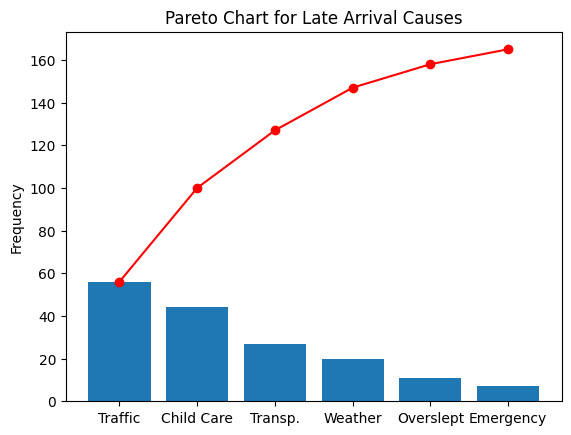

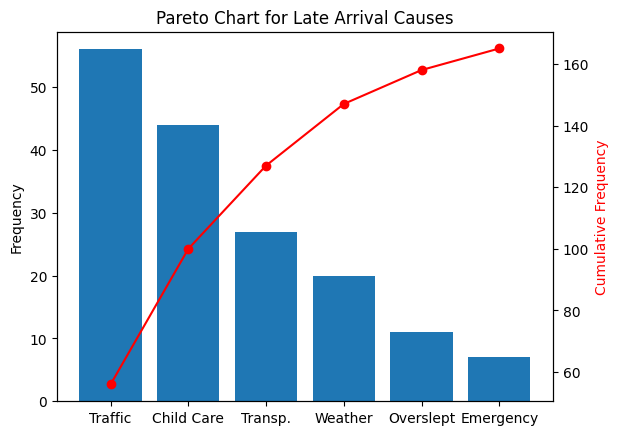

In [10]:
import matplotlib.pyplot as plt

late_arrival_causes = { "Emergency": 7, "Overslept": 11, "Weather": 20, "Transp.": 27, "Child Care": 44, "Traffic": 56}

sorted_causes = sorted(late_arrival_causes.items(), key=lambda x: x[1], reverse=True)

# calculate cumulative frequencies 
cumulative_frequency = [0]
for cause, frequency in sorted_causes:
    cumulative_frequency.append(cumulative_frequency[-1] + frequency)

# plot results
fig, ax = plt.subplots()  
ax.bar([cause[0] for cause in sorted_causes], [cause[1] for cause in sorted_causes])   # bar plot for frequencies
ax.plot([cause[0] for cause in sorted_causes], cumulative_frequency[1:], color='r', marker='o')   # line plot for cumulative frequencies
ax.set_ylabel('Frequency')
plt.title('Pareto Chart for Late Arrival Causes')

# calculate cumulative frequencies (alt.)
cumulative_frequencies = [56]
for cause, frequency in sorted_causes[1:]:
    cumulative_frequencies.append(cumulative_frequencies[-1] + frequency)

# plot results (alt.)
fig, ax1 = plt.subplots()
ax1.bar([cause[0] for cause in sorted_causes], [cause[1] for cause in sorted_causes])    # bar plot 
ax2 = ax1.twinx()   # creates a new (twin) y-axis 
ax2.plot([cause[0] for cause in sorted_causes], cumulative_frequencies, color='r', marker='o')  # line plot  
ax1.set_ylabel('Frequency')
ax2.set_ylabel('Cumulative Frequency', color='r')
plt.title('Pareto Chart for Late Arrival Causes')
plt.show()

---

# Preprocessing pipelines (30 points)

## Question 6 (20 points)

- Download a 19th-century edition (or earlier, but not later!) of a book you like from the [Internet Archive](https://archive.org) in `.txt` format. For example, [Frankenstein](https://archive.org/details/ghostseer01schiuoft/page/n6). Add the link to the edition you used to your answer, as well as the `.txt` file to your submission.

- Write code that:

    1. Reads the text in memory.
    
    1. Pre-processes the text with a tokenizer from [NLTK](https://www.nltk.org/api/nltk.tokenize.html) (remember to motivate your choice of tokenizer) and optionally other preprocessing steps if you feel this helps.
    
    1. Filter out words that consist of strictly less than 4 alphabetic characters.

    1. Counts the frequencies of all the words in the corpus (words should be counted case-insensitive).

    1. Writes each word-frequency pair to a csv file (from most frequent to rarest).

*Briefly* comment on your results, especially looking at very frequent and very infrequent words. What is problematic about processing these old editions? Can you find some limitations of the tokenizer in use, and think about how you would improve on it? Naturally, this part is required for full points.

**Possible extra:** plot the relative frequency of the top N words (e.g., use the Pareto chart you did above, or another suitable plot) and discuss whether the distribution might follow the [Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law).

**Possible extra:** add lemmatization or stemming and part-of-speech tagging.

link for txt file: https://archive.org/details/AliceInWonderland_458

> The function takes a text and tokenizes the text into words using a regular expression and filters out words that are not alphabetic or have less than 4 characters. I chose the RegexpTokenizer (https://www.nltk.org/api/nltk.tokenize.RegexpTokenizer.html) because it is customizable hence is more straightforward for me and easier to fix if I want to change something based on past exercises. The function then removes stopwords using NLTK's predefined list and returns the preprocessed list of tokens. The function `word_frequencies()` creates a frequency distribution of the input tokens using NLTK's FreqDist, sorts the frequency distribution based on descending frequency order, and returns a list of tuples containing words and their corresponding frequencies. The `create_csv()` writes the sorted word frequencies to a CSV file. The final output is by opening the text file and calling for the functions to tokenize, sort, and create a file `Alice_word_frequencies.csv` of sorted word frequencies by descending order. 

> Comments: there are some stopwords (names, "little", etc.) with high frequency which suggests that the NLTK library's default stopwords are not up to date or inclusive of these words. My choice of tokenizer can be limiting to words with hyphens or non-alphabetic characters. This can be improved by trying out different tokenizers or setting different/more expressions to have better results. 

> I used inspiration from (https://www.geeksforgeeks.org/removing-stop-words-nltk-python/) to remove stop words with NLTK 

In [11]:
import nltk
import csv
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist

# preprocessing the text and removing stop words
def preprocess_text(text):
    tokenizer = RegexpTokenizer(r'\b\w+\b')     # tokenize the text using RegexpTokenizer
    tokens = tokenizer.tokenize(text)
    filtered_tokens = [word.lower() for word in tokens if word.isalpha() and len(word) >= 4]    # omit words with less than 4 alphabetic characters
    stop_words = set(nltk.corpus.stopwords.words('english'))     
    filtered_tokens = [word for word in filtered_tokens if word not in stop_words]  # remove stopwords
    return filtered_tokens

# calculating word frequency 
def word_frequencies(tokens):
    freq_dist = FreqDist(tokens)      # count word frequencies
    sorted_freq = sorted(freq_dist.items(), key=lambda x: x[1], reverse=True)   # create a list of tuples
    return sorted_freq

# create a csv file
def create_csv(sorted_freq, output_file):
    with open(output_file, 'w', newline='', encoding='utf-8') as csvfile:
        csv_writer = csv.writer(csvfile)    # create a csv file
        csv_writer.writerow(['Word', 'Frequency'])
        csv_writer.writerows(sorted_freq)

# printing results
with open('data/alice-wonderland_djvu.txt', 'r', encoding='utf-8') as file:
    text = file.read()

tokens = preprocess_text(text)      
sorted_freq = word_frequencies(tokens)     
create_csv(sorted_freq, 'Alice_word_frequencies.csv')    


## Question 7 (10 points)

Do some self-learning: implement the same pipeline of question 6 using [spaCy pipelines](https://spacy.io/usage/processing-pipelines).

Hint: Make sure to know what Spacy does by default when loading specific models, the defaults are not always what you need.

In [4]:
import spacy
import csv
from collections import Counter

nlp = spacy.load("en_core_web_sm")

# preprocessing the text
def preprocess_text_spacy(text):
    doc = nlp(text)
    filtered_tokens = [token.text.lower() for token in doc if token.is_alpha and len(token.text) >= 4]
    return filtered_tokens

# calculating word frequency 
def count_word_frequencies_spacy(tokens):
    freq_counter = Counter(tokens)
    return freq_counter

# write a csv file
def write_to_csv_spacy(freq_counter, csv_filename):
    sorted_freq_counter = freq_counter.most_common()
    with open(csv_filename, mode='w', newline='', encoding='utf-8') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(['Word', 'Frequency'])
        writer.writerows(sorted_freq_counter)

# printing results
with open('data/alice-wonderland_djvu.txt', 'r', encoding='utf-8') as file:
    corpus_text_spacy = file.read()

preprocessed_tokens_spacy = preprocess_text_spacy(corpus_text_spacy)    
word_frequencies_spacy = count_word_frequencies_spacy(preprocessed_tokens_spacy)    
write_to_csv_spacy(word_frequencies_spacy, 'Alice_word_frequencies_spacy.csv')



---

# Descriptive text analysis (20 points)

## Question 8 (20 points)

In the `data/numan` directory, there are lyrics of some songs from two albums by electronic music pioneer Gary Numan. There are 5 songs from his 1979 album and 5 songs from his 2017 album.  This data was acquired from [Genius](https://genius.com) (Genius Lyrics) using their API, something that you could do too using the lyricsgenius package for Python!

- Load the data from these files into an appropriate data structure and perform appropriate preprocessing. 

*Hint: This might be a good opportunity to show how good you were at writing re-usable code in the previous questions.*

- Write a function that can return some statistics about an albums' song lyrics, and run this function for both albums:

    * Most frequent words
    * Type to token ratio (unique words/words)
    * Average word length
    * Longest and shortests songs (by lyrics)
    * What are the songs with the largest vocabulary and smallest vocabulary?
    
- Print these results to your notebook for both albums in a nice looking way. Then, also show these same statistics for just the song 'Cars' from the 1979 album, which was Gary Numan's most famous song.
   
   * Write down your interpretation of these results in this notebook.  
   * In which of the two time periods was Gary Numan more verbose? Back it with some evidence.
   * Electronic music is sometimes said to make more use of repetition than other forms of music. In which of the two time periods did Gary Numan make more use of lyrical repetition? You can either argue your case based on the numbers you were asked to calculate, or you can come up with your own definition of 'repetitiveness' and calculate it with Python code.

> I used chatGPT to help me with this because I did not know how to run through multiple files in more than one folder. ChatGPT helped with making the function `load_lyrics()` as it showed me how to do it for future cases and I worked on the rest. The first function initializes an empty dictionary to store the lyrics, and then it goes through a loop to check if the entry is a directory. Followed with another iteration through each song file to check if it is a text file, and then it reads the lyrics from each file and store it in the empty dictionary made prior and is then returned as `data`. The following are functions made to proprocess the texts, calculate the frequency, formatting, and printing the results.

> Comment: the 1979 album has a higher type-to-token ratio (0.35) compared to the 2017 album (0.23) which suggests that a higher diversity of words relative to the total number of word hence less repetitive words. This implies that Gary Numan was more verbose in the earlier 1979 album than 2017. In terms of lyrical repetition, based on the most frequent words of each album, the 2017 album has a higher number of repetition and it has a lower type-to-token ratio which suggests that it has lower diversity of words hence more repetitions. 

In [43]:
import os
import re
from collections import Counter

def load_lyrics(directory):
    data = {}
    for album_title in os.listdir(directory):
        album_path = os.path.join(directory, album_title)

        if os.path.isdir(album_path):       # check if the entry is a directory
            data[album_title] = {}
            for filename in os.listdir(album_path):
                song_title, extension = os.path.splitext(filename)
                if extension == ".txt":     # check if the file is a text file
                    with open(os.path.join(album_path, filename), "r", encoding="utf-8") as file:
                        data[album_title][song_title] = file.read()
    return data

numan_lyrics = load_lyrics("data/numan")    # load lyrics for both albums

# preprocessing the text
def preprocess_lyrics(lyrics):
    words = re.findall(r'\b\w+\b', lyrics.lower())  # tokenization and lowercasing
    return words

# formatting results
def calculate_frequency(lyrics_data, album_title, song_title=None):
    if song_title is not None:
        print(f"\nStatistics for the song '{song_title}' from {album_title} Album:")
        lyrics = lyrics_data[album_title][song_title]
    else:
        print(f"\nStatistics for {album_title} Album:")
        lyrics = " ".join(lyrics_data[album_title].values())    # link lyrics from all songs in the album

    preprocessed_lyrics = preprocess_lyrics(lyrics)

## results
# most frequent word
    word_counts = Counter(preprocessed_lyrics)
    most_frequent_words = word_counts.most_common(7)
    print("Most Frequent Words:")
    for word, count in most_frequent_words:
        print(f"{word}: {count}")

# type to token ratio
    type_to_token_ratio = len(set(preprocessed_lyrics)) / len(preprocessed_lyrics)
    print(f"Type to Token Ratio: {type_to_token_ratio:.2f}")

# average word length
    average_word_length = sum(len(word) for word in preprocessed_lyrics) / len(preprocessed_lyrics)
    print(f"Average Word Length: {average_word_length:.2f}")

# longest and shortest songs (by lyrics)
    longest_song = max(lyrics_data[album_title], key=lambda song: len(preprocess_lyrics(lyrics_data[album_title][song])))
    shortest_song = min(lyrics_data[album_title], key=lambda song: len(preprocess_lyrics(lyrics_data[album_title][song])))
    print(f"Longest Song: '{longest_song}' ({len(preprocess_lyrics(lyrics_data[album_title][longest_song]))} words)")
    print(f"Shortest Song: '{shortest_song}' ({len(preprocess_lyrics(lyrics_data[album_title][shortest_song]))} words)")

# songs with largest and smallest vocabulary
    largest_vocabulary = max(lyrics_data[album_title], key=lambda song: len(set(preprocess_lyrics(lyrics_data[album_title][song]))))
    smallest_vocabulary = min(lyrics_data[album_title], key=lambda song: len(set(preprocess_lyrics(lyrics_data[album_title][song]))))
    print(f"Largest Vocabulary Song: '{largest_vocabulary}' ({len(set(preprocess_lyrics(lyrics_data[album_title][largest_vocabulary])))})")
    print(f"Smallest Vocabulary Song: '{smallest_vocabulary}' ({len(set(preprocess_lyrics(lyrics_data[album_title][smallest_vocabulary])))})")

# printing results 
calculate_frequency(numan_lyrics, "1979_pleasureprinciple")
calculate_frequency(numan_lyrics, "2017_savage")
calculate_frequency(numan_lyrics, "1979_pleasureprinciple", "cars")



Statistics for 1979_pleasureprinciple Album:
Most Frequent Words:
i: 33
my: 29
we: 25
you: 23
are: 20
and: 16
conversation: 16
Type to Token Ratio: 0.35
Average Word Length: 3.56
Longest Song: 'metal' (137 words)
Shortest Song: 'cars' (88 words)
Largest Vocabulary Song: 'metal' (86)
Smallest Vocabulary Song: 'engineers' (31)

Statistics for 2017_savage Album:
Most Frequent Words:
i: 90
you: 65
the: 56
when: 44
and: 41
is: 37
a: 35
Type to Token Ratio: 0.23
Average Word Length: 3.64
Longest Song: 'theendofthings' (319 words)
Shortest Song: 'mynameisruin' (244 words)
Largest Vocabulary Song: 'theendofthings' (134)
Smallest Vocabulary Song: 'mynameisruin' (49)

Statistics for the song 'cars' from 1979_pleasureprinciple Album:
Most Frequent Words:
in: 8
i: 7
my: 6
here: 4
car: 4
cars: 4
can: 3
Type to Token Ratio: 0.57
Average Word Length: 3.47
Longest Song: 'metal' (137 words)
Shortest Song: 'cars' (88 words)
Largest Vocabulary Song: 'metal' (86)
Smallest Vocabulary Song: 'engineers' (31